### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [64]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as plt

#### Reading in `coupons.csv` 




In [65]:
df = pd.read_csv('/Users/lois/Desktop/ML/Module 5/assignment_5_1_starter/data/coupons.csv')

In [66]:
pd.set_option("display.max_columns", None)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


### Data Cleaning

In [67]:
#correcting the spelling of "passanger" column
df = df.rename(columns = {"passanger" : "passenger"})

#renaming the "car" column to "vehicle"
df = df.rename(columns = {"car" : "vehicle"})

#renaming the "Y" column to "coupon accepted"
df = df.rename(columns = {"Y" : "coupon accepted"})

#converting datatype into string and Int64
df = df.convert_dtypes()

#### Searching the dataset for missing or problematic data

In [89]:
#identifying the columns with null values 
df.isnull().sum()

#original df contained 12684 rows, and after dropping the null values in every column excluding 'car', we are left with 12079 rows 
df = df.dropna(subset=['CarryAway', 'Bar', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50']) 

#### Modifying the `vehicle` column

In [153]:
#descriptive statistics for 'vehicle' column
df['vehicle'].value_counts()

#renaming values in the columns by combining "Mazda5" and "Car that is too old to install Onstar :D" into a new category "Car"
df['vehicle'] = df['vehicle'].replace({"Mazda5" : "Car", "Car that is too old to install Onstar :D" : "Car"})

#replacing NA values with the biggest category (Car)
df['vehicle'] = df['vehicle'].fillna("Car")

#### Computing the proportion of the total observations that chose to accept the coupon



Of the total observations, ~56.93% chose to accept the coupon

In [71]:
proportion_accepted = df[df['coupon accepted'] == 1].value_counts().sum() / df['coupon accepted'].value_counts().sum()
proportion_accepted

0.5693352098683666

#### Visualising the `coupon` column using a bar plot

The majority of the coupons were for coffee houses, followed by restaurants that cost less than 20 dollars per person and take away restaruants. The fewest number of coupons in this dataset are for bars and restaurants costing 20-50 dollars per person

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

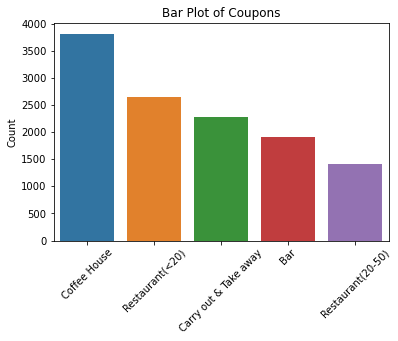

In [151]:
sns.barplot(x = df.coupon.value_counts().index, y = df.coupon.value_counts()).set(title = "Bar Plot of Coupons", ylabel = "Count")
sns.color_palette("RdPu")
plt.xticks(rotation = 45)

#### Visualizing the Temperature column with a histogram
The 80-99 degree category has the largest percentage of those who accepted the coupon at ~60%. This category is followed by the 40-59 degree range with ~54% accepting the coupon, and the 20-39 degree range with ~54% accepting. There were no data points for the 60-79 degree range. 

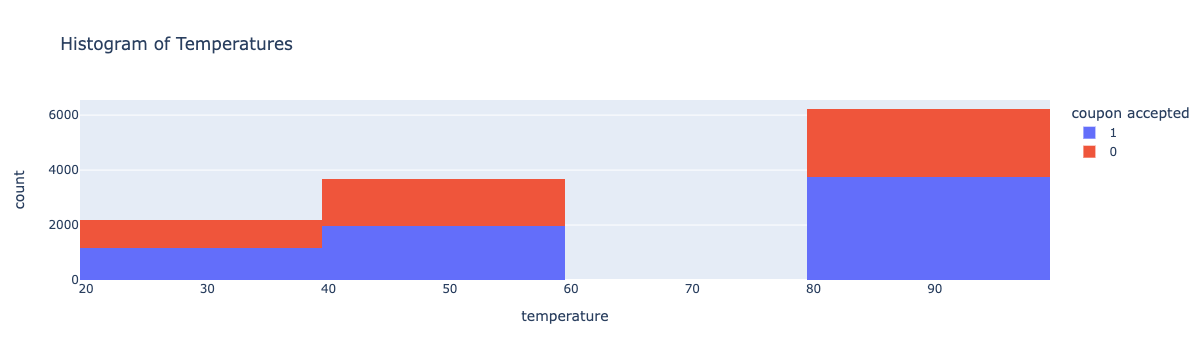

In [109]:
px.histogram(df, x = "temperature", title = "Histogram of Temperatures", labels = {"Temperature":"Count"}, color = "coupon accepted")

### Investigating the Bar Coupons

Creating a new `DataFrame` that contains just the bar coupons

In [74]:
df_bar = df.query('coupon == "Bar"')
df_bar.head(3)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,vehicle,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon accepted
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,Car,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,Car,never,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,Car,never,less1,4~8,4~8,less1,1,1,1,0,1,1


#### Computing the proportion of bar coupons that were accepted 

~41% of bar coupons offered were accepted

In [75]:
proportion_bar_accepted = df_bar[df_bar["coupon accepted"] == 1].value_counts().sum() / df_bar.value_counts().sum()
proportion_bar_accepted

0.41191845269210664

#### Comparing the acceptance rates of those who went to a bar 3 or fewer times a month to those who went more


The acceptance rate of those who went to a bar 3x or less per month is 0.37

The acceptance rate of those who went to a bar at least 3x a month is 0.76

In [76]:
df_bar_max3 = df_bar.query('Bar == "never" | Bar == "less1" | Bar == "1~3"')
df_bar_min3 = df_bar.query('Bar == "4~8" | Bar == "gt8"')

acceptance_max3 = df_bar_max3[df_bar_max3["coupon accepted"] == 1].value_counts().sum() / df_bar_max3.value_counts().sum()
print("The acceptance rate of those who went to a bar less than 3x a month is", acceptance_max3)

acceptance_min3 = df_bar_min3[df_bar_min3["coupon accepted"] == 1].value_counts().sum() / df_bar_min3.value_counts().sum()
print("The acceptance rate of those who went to a bar at least 3x a month is", acceptance_min3)

The acceptance rate of those who went to a bar less than 3x a month is 0.37267441860465117
The acceptance rate of those who went to a bar at least 3x a month is 0.7616580310880829


#### Comparing the acceptance rates between drivers who go to a bar more than once a month and are over the age of 25 to the all others



The acceptance rate of drivers over 25 that go to a bar more than once a month (0.69) is considerably higher than that of all other drivers (0.34)

In [154]:
#creating a new column "int_age" and replacing the values "50plus" with "51" and "below21" with "20"
df_bar.loc[:, "int_age"] = df_bar.loc[:, "age"].str.replace("50plus", "51").str.replace("below21", "20")

#changing the datatype of int_age column to int64
df_bar["int_age"] = pd.to_numeric(df_bar["int_age"])

#identifying drivers over the age of 25 who visit the bar at least once a month  
drivers_25plus_bar_min1 = df_bar.query('Bar == "1~3" | Bar == "4~8" | Bar == "gt8"').query('int_age >= 25')

#identifying drivers either under 25 or visit the bar less than once a month
not_drivers_25plus_bar_min1  = df_bar.query('int_age < 25 | (Bar == "never" | Bar == "less1")')

In [155]:
#computing the acceptance rates of both groups 
acceptance_25plus = drivers_25plus_bar_min1[drivers_25plus_bar_min1["coupon accepted"] == 1].value_counts().sum() / drivers_25plus_bar_min1.value_counts().sum()
acceptance_under25 = not_drivers_25plus_bar_min1[not_drivers_25plus_bar_min1["coupon accepted"] == 1].value_counts().sum() / not_drivers_25plus_bar_min1.value_counts().sum()

print("The acceptance rate of drivers over 25 that go to a bar more than once a month is", acceptance_25plus)
print("The acceptance rate of all other drivers is", acceptance_under25)

The acceptance rate of drivers over 25 that go to a bar more than once a month is 0.6898263027295285
The acceptance rate of all other drivers is 0.33774834437086093


#### Comparing the acceptance rates between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

The acceptance rate of drivers that go to a bar more than once a month, have passengers that were not a kid, and had occupations other than farming, fishing, or forestry is ~0.71

The acceptance rate of all other drivers is ~0.30 

In [156]:
#creating a list of industries that individuals should not be in 
occupations = ["farming", "fishing", "forestry"]

#identifying drivers who go to bars more than once a month, have passengers that were not a kid, and had occupations other than farming, fishing, or forestry 
min1_nokids_not3f = df_bar.query('Bar == "1~3" | Bar == "4~8" | Bar == "gt8"').query('occupation not in @occupations').query('passenger != "Kid(s)"')

#identifying the drivers that don't meet the above criteria 
not_min1_nokids_not3f = df_bar.query('(Bar == "never" | Bar == "less1") | (occupation in @occupations) | (passenger == "Kid(s)")')

In [157]:
#computing the acceptance rates of both groups 
acceptance_min1 = min1_nokids_not3f[min1_nokids_not3f["coupon accepted"] == 1].value_counts().sum() / min1_nokids_not3f.value_counts().sum()
acceptance_notmin1 = not_min1_nokids_not3f[not_min1_nokids_not3f["coupon accepted"] == 1].value_counts().sum() / not_min1_nokids_not3f.value_counts().sum()

print("The acceptance rate of drivers that go to a bar more than once a month, have passengers that were not a kid, and had occupations other than farming, fishing, or forestry is", acceptance_min1)
print("The acceptance rate of all other drivers is", acceptance_notmin1)

The acceptance rate of drivers that go to a bar more than once a month, have passengers that were not a kid, and had occupations other than farming, fishing, or forestry is 0.7094339622641509
The acceptance rate of all other drivers is 0.29790310918293567


#### Comparing the acceptance rates between drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K



The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is  ~0.71 

The acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is  ~0.72 

The acceptance rate of drivers who go to cheap restaurants (average expense less than $20/person) more than 4 times a month and income is less than 50K is  ~0.46

In [81]:
#identifying drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
min1_nokids_notwidowed = df_bar.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & (passenger != "Kid(s)") & (maritalStatus != "Widowed")')

#identifying drivers who go to bars more than once a month and are under the age of 30 
min1_under30 = df_bar.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & (int_age < 30)')


#creating a list of income values less than 50K 
incomes_under_50 = ['$12500 - $24999', '$37500 - $49999',  '$25000 - $37499', 'Less than $12500']

#drivers who go to cheap restaurants(average expense less than $20/person) more than 4 times a month and whose income is less than 50K
cheaprestaurantmin4_incomeunder50 = df_bar.query('(RestaurantLessThan20 == "4~8" | RestaurantLessThan20 == "gt8") & (income in @incomes_under_50)')

In [158]:
#computing the acceptance rates of the three groups 
acceptance_min1_nokids_notwidowed = min1_nokids_notwidowed[min1_nokids_notwidowed["coupon accepted"] == 1].value_counts().sum() / min1_nokids_notwidowed.value_counts().sum()
acceptance_min1_under30 = min1_under30[min1_under30["coupon accepted"] == 1].value_counts().sum() / min1_under30.value_counts().sum()
acceptance_cheaprestaurantmin4_incomeunder50 = cheaprestaurantmin4_incomeunder50[cheaprestaurantmin4_incomeunder50["coupon accepted"] == 1].value_counts().sum() / cheaprestaurantmin4_incomeunder50.value_counts().sum()

print("The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is ", np.round(acceptance_min1_nokids_notwidowed, 2))
print("The acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is ", np.round(acceptance_min1_under30, 2))
print("The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is ", np.round(acceptance_cheaprestaurantmin4_incomeunder50, 2))


The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is  0.71
The acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is  0.72
The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is  0.46


#### Summary and Conclusions on Drivers who accepted the bar coupons

Of the 41% of bar coupons that were accepted, 
- Drivers that go to a bar more than three times a month had a far greater coupon acceptance rate (.76) than drivers who go to a bar three times or less (.37)
- The acceptance rate of drivers who go to a bar at least once a month and are older than the age of 25 (.69) are roughly twice that of the acceptance rate of all other individuals in the sample (.34)
- Drivers who go to a bar at least once a month, did not have kids as passengers, and did not work in the farming, fishing, or forestry industries had an acceptance rate (.71) over twice that of all other individuals (.30) 
- The majority of individuals who visit the bar more than once, did not have kids as passengers, and were not widowed accepted the coupon (.71)
- Similarly, the majority of individuals under the age of 30 and visit the bar at least once a month accepted the coupon (.72)
- On the other hand, individuals who visited cheap restaurants more than four times a month and had an income under $50,000 largely did not accept the coupon (acceptance rate .46)

Based on these observations, it is reasonable to hypothesize that the the number of times someone visits a bar in a month is positively correlated with the likelihood of their accepting a bar coupon: Drivers that go to the bar at least three times a month are more likely to accept a bar coupon than drivers that go to the bar at least once a month, who are more likely to accept than those who visit the bar less than once a month. Actions to take include **targetting individuals who go to a bar at least once a month and prioritizing those who visit the bar at least three times a month. Additionally, those who do not have kids in the passenger and are between the ages 25-30 should be prioritized.**

### Further Investigation on Carry out & Take away Coupons

Exploring the Carry out and Take away coupon group to determine the characteristics of passengers who accept these coupons

In [159]:
#creating a new dataframe with only Carry out & Take away coupons
df_takeaway = df.query('coupon == "Carry out & Take away"')
df_takeaway.head(3)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,vehicle,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon accepted
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,Car,never,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,Car,never,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,Car,never,less1,4~8,4~8,less1,1,0,0,1,0,1


#### Computing the proportion of takeaway coupons that were accepted

The proportion of takeaway coupons that were accepted is ~.74

In [113]:
proportion_takeaway_accepted = df_takeaway[df_takeaway['coupon accepted'] == 1].value_counts().sum() / df_takeaway.value_counts().sum()   
proportion_takeaway_accepted

0.737719298245614

#### Visualizing the distribution of destinations of drivers offered a takeaway coupon

This histogram shows that the majority of individuals on their way to all three destination groups accepted their takeaway coupon. The most popular destination of the individuals in this dataset is "No Urgent Place", followed by "Work", and "Home", respectively.

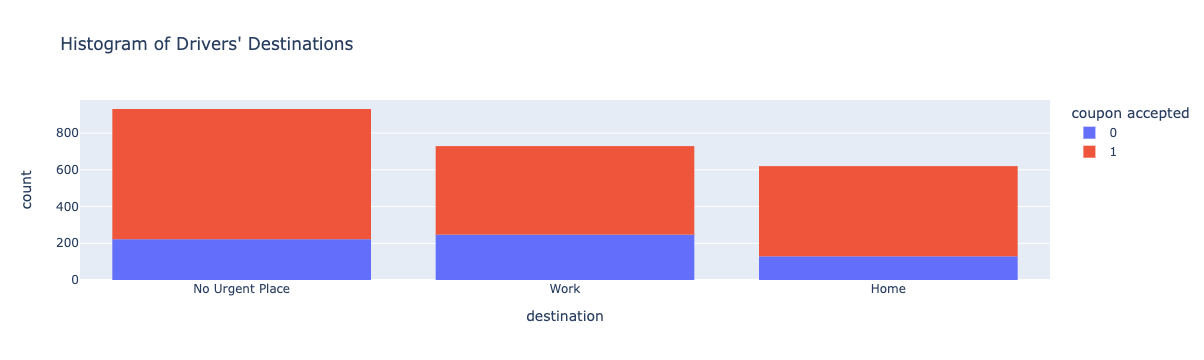

In [97]:
px.histogram(df_takeaway, x = "destination", title = "Histogram of Drivers' Destinations", color = "coupon accepted", labels = {"Destination", "Count"})

#### Comparing the proportion of coupon acceptances of the three destination groups

The acceptance rate of drivers going to no urgent place is ~0.76

The acceptance rate of drivers going to work is ~0.66

The acceptance rate of drivers going home is ~0.79

In [98]:
#drivers on their way to no urgent place
no_urgent_place = df_takeaway.query('destination == "No Urgent Place"')

#drivers on their way to work
work = df_takeaway.query('destination == "Work"')

#drivers on their way home
home = df_takeaway.query('destination == "Home"')

#computing the proportion of acceptances for the three groups
proportion_nup_accepted = no_urgent_place[no_urgent_place["coupon accepted"] == 1].value_counts().sum() / no_urgent_place.value_counts().sum()
proportion_work_accepted = work[work["coupon accepted"] == 1].value_counts().sum() / work.value_counts().sum()
proportion_home_accepted = home[home["coupon accepted"] == 1].value_counts().sum() / home.value_counts().sum()


print("The acceptance rate of drivers going to no urgent place is", proportion_nup_accepted)
print("The acceptance rate of drivers going to work is", proportion_work_accepted)
print("The acceptance rate of drivers going home is", proportion_home_accepted)

The acceptance rate of drivers going to no urgent place is 0.761546723952739
The acceptance rate of drivers going to work is 0.6611796982167353
The acceptance rate of drivers going home is 0.7919354838709678


#### Comparing the acceptance rates of drivers who buy takeout food more than three times a month to all others

The acceptance rate of those who get takeaway 3x or less a month is ~0.72

The acceptance rate of those who get takeaway more than 3x a month is ~0.75

In [100]:
#selecting drivers who get takeaway up to 3x and over 3x a month
takeaway_max3 = df_takeaway.query('CarryAway == "never" | CarryAway == "less1" | CarryAway == "1~3"')
takeaway_min3 = df_takeaway.query('CarryAway == "4~8" | CarryAway == "gt8"')

#calculating the acceptance rates of both groups 
takeaway_acceptance_max3 = takeaway_max3[takeaway_max3["coupon accepted"] == 1].value_counts().sum() / takeaway_max3.value_counts().sum()
takeaway_acceptance_min3 = takeaway_min3[takeaway_min3["coupon accepted"] == 1].value_counts().sum() / takeaway_min3.value_counts().sum()

print("The acceptance rate of those who get takeaway 3x or less a month is", takeaway_acceptance_max3)
print("The acceptance rate of those who get takeaway more than 3x a month is", takeaway_acceptance_min3)

The acceptance rate of those who get takeaway 3x or less a month is 0.723563696919234
The acceptance rate of those who get takeaway more than 3x a month is 0.7534754402224282


#### Comparing the acceptance rates of drivers who buy takeout food more than once a month to all others

The acceptance rate of those who get takeaway less than once a month is ~0.69, while
the acceptance rate of those who get takeaway at least once a month is ~0.75

In [115]:
#selecting drivers who get takeaway up to once a month vs those who get takeaway at least once a month
takeaway_max1 = df_takeaway.query('CarryAway == "never" | CarryAway == "less1"')
takeaway_min1 = df_takeaway.query('CarryAway == "1~3" | CarryAway == "4~8" | CarryAway == "gt8"')

#calculating the acceptance rates of both groups 
takeaway_acceptance_max1 = takeaway_max1[takeaway_max1["coupon accepted"] == 1].value_counts().sum() / takeaway_max1.value_counts().sum()
takeaway_acceptance_min1 = takeaway_min1[takeaway_min1["coupon accepted"] == 1].value_counts().sum() / takeaway_min1.value_counts().sum()

print("The acceptance rate of those who get takeaway less than once a month is", takeaway_acceptance_max1)
print("The acceptance rate of those who get takeaway at least once a month is", takeaway_acceptance_min1)

The acceptance rate of those who get takeaway less than once a month is 0.6873315363881402
The acceptance rate of those who get takeaway at least once a month is 0.7475117862755369


#### Visualizing the marital statuses of drivers who get takeaway less than once a month vs drivers who get takeaway at least once a month

These pie charts show that most of the drivers who get takeaway less than once a month are single(46%) and married (36.1%). A smaller proportion of drivers who get takeaway at least once a month are single (37.8%), and a greater proportion of these drivers are married (39.8%)

<Figure size 648x648 with 0 Axes>

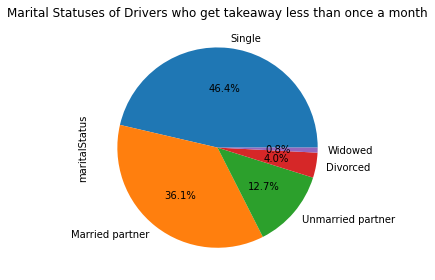

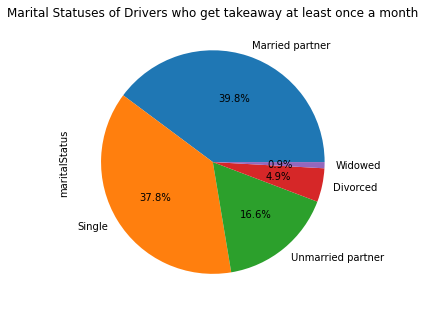

<Figure size 648x648 with 0 Axes>

In [143]:
from matplotlib import pyplot as plt

plt.subplot(1, 1, 1)
takeaway_max1['maritalStatus'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', title = "Marital Statuses of Drivers who get takeaway less than once a month")
plt.tight_layout()
plt.figure(figsize = (9, 9))

plt.subplot(1, 2, 1)
takeaway_min1['maritalStatus'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', title = "Marital Statuses of Drivers who get takeaway at least once a month")
plt.tight_layout()
plt.figure(figsize = (9, 9))


#### Comparing the acceptance rates of married individuals who buy takeout food less than once a month to all others

The acceptance rate of married individuals going home who get takeout less than once a month is ~0.67

The acceptance rate of all others is ~0.74

In [161]:
#married drivers going home who get takeout less than once a month
married_max1_home = df_takeaway.query('CarryAway == "never" | CarryAway == "less1"').query('maritalStatus == "Married partner"').query('destination == "Home"')

#all others 
not_married_max1_home = df_takeaway.query('CarryAway == "1~3" | CarryAway == "4~8" | CarryAway == "gt8" | maritalStatus != "Married partner"| destination != "Home"')

#calculating acceptance rate
married_max1_home_acceptance = married_max1_home[married_max1_home["coupon accepted"] == 1].value_counts().sum() / married_max1_home.value_counts().sum()
print("The acceptance rate of married individuals going home who get takeout less than once a month is", married_max1_home_acceptance)

not_married_max1_home_acceptance = not_married_max1_home[not_married_max1_home["coupon accepted"] == 1].value_counts().sum() / not_married_max1_home.value_counts().sum()
print("The acceptance rate of all others is", not_married_max1_home_acceptance)


The acceptance rate of married individuals going home who get takeout less than once a month is 0.6744186046511628
The acceptance rate of all others is 0.7389360751005811


#### Comparing the acceptance rates of married individuals going home who buy takeout food at least once a month to all others

The acceptance rate of married individnuals going home who get takeout at least once a month is ~0.78

The acceptance rate of all others is ~0.73

In [160]:
#married drivers going home who get takeout at least once a month
married_min1_home = df_takeaway.query('CarryAway == "1~3" | CarryAway == "4~8" | CarryAway == "gt8"').query('maritalStatus == "Married partner"').query('destination == "Home"')

#all others 
not_married_min1_home = df_takeaway.query('CarryAway == "never" | CarryAway == "less1" | maritalStatus != "Married partner" | destination != "Home"')


#calculating acceptance rate
married_min1_home_acceptance = married_min1_home[married_min1_home["coupon accepted"] == 1].value_counts().sum() / married_min1_home.value_counts().sum()
not_married_min1_home_acceptance = not_married_min1_home[not_married_min1_home["coupon accepted"] == 1].value_counts().sum() / not_married_min1_home.value_counts().sum()

print("The acceptance rate of married individnuals who get takeout at least once a month is", married_min1_home_acceptance)
print("The acceptance rate of all others is", not_married_min1_home_acceptance)

The acceptance rate of married individnuals who get takeout at least once a month is 0.7760416666666666
The acceptance rate of all others is 0.7341954022988506


#### Comparing the rejection rate of single individuals who get takeout less than once a month and are on their way to work with all others 

The rejection rate of single individnuals on their way to work who get takeout less than once a month is ~0.34.
The rejection rate of all others is ~0.26.

In [150]:
#single individuals who get takeout less than once a month and are on their way to work
single_max1_work = df_takeaway.query('CarryAway == "never" | CarryAway == "less1"').query('maritalStatus == "Single"').query('destination == "Work"')

#all others 
not_single_max1_work = df_takeaway.query('CarryAway == "1~3" | CarryAway == "4~8" | CarryAway == "gt8" | maritalStatus != "Single" | destination != "Work"')

#calcuating rejection rates 
single_max1_work_rejection = single_max1_work[single_max1_work["coupon accepted"] == 0].value_counts().sum() / single_max1_work.value_counts().sum()
not_single_max1_work_rejection = not_single_max1_work[not_single_max1_work["coupon accepted"] == 0].value_counts().sum() / not_single_max1_work.value_counts().sum()

print("The rejection rate of single individnuals on their way to work who get takeout less than once a month is", single_max1_work_rejection)
print("The rejection rate of all others is", not_single_max1_work_rejection)

The rejection rate of single individnuals on their way to work who get takeout less than once a month is 0.3448275862068966
The rejection rate of all others is 0.2601260126012601


#### Summary and Conclusions on Takeaway Coupons

Of the 74% of takeaway coupons that were accepted, 

- Drivers going home have the highest acceptance rates of takeaway coupons (.79), followed by those going to no urgent place (.76), and those heading to work (.66)
- Individuals who get takeaway more than 3x a month have a slightly higher acceptance rate (.75) than those who get takeaway 3x or less (.72)
- There is a wider gap between the acceptance rates of drivers who buy takeout food less than once a month vs at least once a month. A greater proportion of those who get takeaway at least once a month accept the takeaway coupon (.75) compared to those who get takeaway less than once a month (.69)
- The biggest group of individuals who buy takeout food less than once a month are single, while those those buy takeout food more than once a month are mostly married 

- The acceptance rate of married individuals going home who get takeout less than once a month (.67) is lower than that of all others (.74), and married individuals going home who get takeout at least once a month (.74) have a slightly higher acceptance rate than all other groups (.73)
- Single individuals on their way to work who get takeout less than once a month are more likely to reject a takeaway coupon (.34) than all others (.26)

As such, it is reasonable to hypothesize that the likelihood of someone accepting a takeaway coupon increases with the number of times they buy takeout food each month, as well as that individuals on their way home are the most likely to accept a takeaway coupon. Actions to take include **prioritizing individuals who buy takeout food at least once a month and are either on their way to no urgent place or going home**.  

#### Next Steps and Recommendations 

- It is recommended that **bar coupons be offered individuals who visit the bar a greater number of times (preferably more than 3x a month)** 
- **Targetting individuals who visit the bar at least once a month and are over the age of 25 and/or under the age of 30 should be prioritized, as well as individuals who do not have kids as passengers and do not work in the farming, fishing, or forestry industries** 
- **Individuals who visit cheap restaurants more than four times a month and have an income under $50,000 should not be prioritized for bar coupons** 

- For takeaway coupons, **targetting individuals who buy takeout food more frequently (over once a month) should be prioritzed over those who buy takeout food less than once a month**
- **Married couples who get takeout at least once a month should be targetted** 
- Targetting **individuals either heading home or going to no urgent place should be prioritized** over those on their way to work   
- It is recommended that **other individuals be targetted over married individuals who get takeout less than once a month and are going home** 
- Additionally, **single individuals on their way to work who get takeout less than once a month should not be prioritized for takeaway coupons** 

Overall, a noticeably greater proportion of takeaway coupons are accepted compared to bar coupons, so **it is recommended that more takeaway coupons are offered.**
